In [3]:
library(repr)
library(tidyverse)
library(tidymodels)
library(reactable)

ERROR: Error in library(reactable): there is no package called ‘reactable’


In [4]:
raw_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
raw_data <- read_csv(raw_data_url,col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang" ,"oldpeak" ,"slope" ,"ca" ,"thal" ,"num"))
tidy_data <- raw_data |>
                select(age,trestbps,chol,num) |>
                    rename("age" = "age",
                           "resting.blood.pressure" = "trestbps" ,
                           "cholestrol" = "chol",
                           "likelihood" = "num") |>
                    mutate(likelihood = case_when(likelihood == 0 ~ "Absent",
                                                  likelihood != 0 ~ "Present")) |>
                    mutate(likelihood = as.factor(likelihood))
tidy_data
                

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,resting.blood.pressure,cholestrol,likelihood
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,Absent
67,160,286,Present
67,120,229,Present
37,130,250,Absent
41,130,204,Absent
56,120,236,Absent
62,140,268,Present
57,120,354,Absent
63,130,254,Present


training data

In [5]:
set.seed(1) ## DO NOT CHANGE

## splitting into training and testing data
data_split <- initial_split(tidy_data, prop = 0.75, strata = likelihood)
data_train <- training(data_split)
data_test <- testing(data_split)

 the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


In [6]:
data_count <- data_train |> 
        group_by(likelihood) |>
        summarize(count = n())
data_count

likelihood,count
<fct>,<int>
Absent,123
Present,104


In [7]:
##Average Values of all predictors for observations with "absent"

data_absent_mean <- data_train |>
        filter(likelihood == "Absent") |>
        summarize(across(age:cholestrol, mean)) |>
         rename("mean.age" = "age",
                           "mean.resting.blood.pressure" = "resting.blood.pressure" ,
                           "mean.cholestrol" = "cholestrol") 

data_absent_mean

mean.age,mean.resting.blood.pressure,mean.cholestrol
<dbl>,<dbl>,<dbl>
52.96748,130.4553,243.9106


In [8]:
##Average Values of all predictors for observations with "present"
data_present_mean <- data_train |>
        filter(likelihood == "Present") |>
        summarize(across(age:cholestrol, mean)) |>
         rename("mean.age" = "age",
                           "mean.resting.blood.pressure" = "resting.blood.pressure" ,
                           "mean.cholestrol" = "cholestrol")

data_present_mean

mean.age,mean.resting.blood.pressure,mean.cholestrol
<dbl>,<dbl>,<dbl>
57.23077,135.5096,250.5673


In [9]:
##Visulations

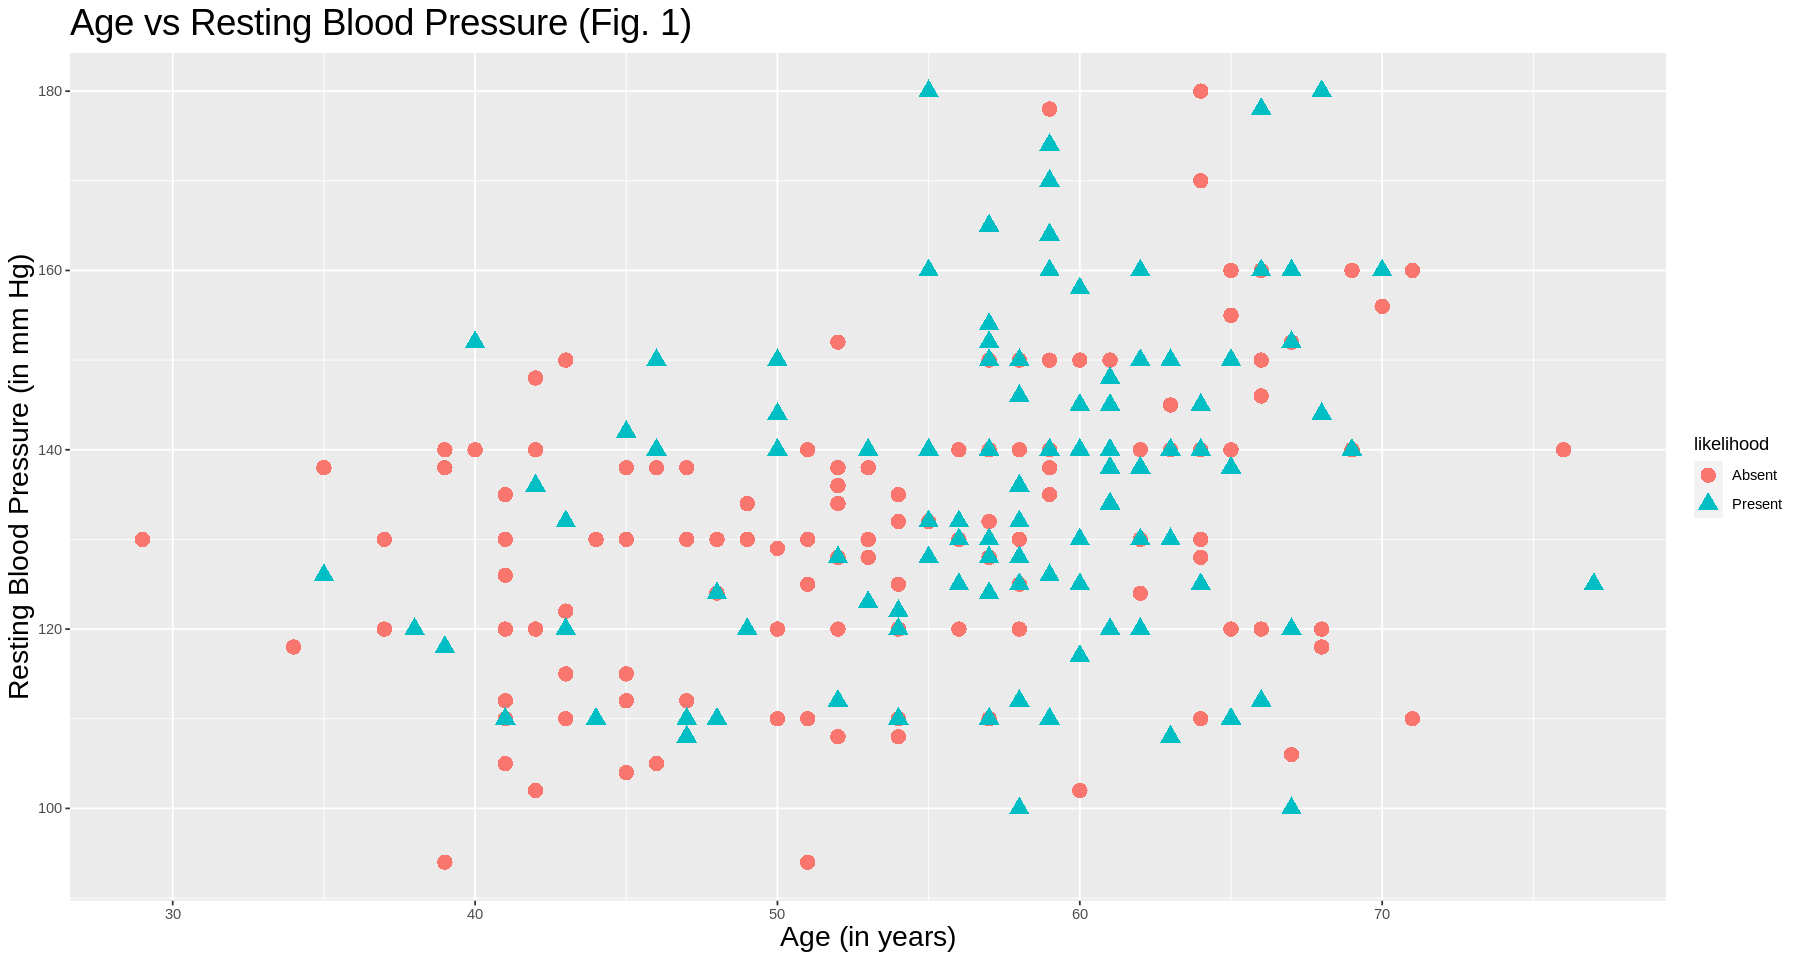

In [14]:
##Age vs Blood Pressure, coloured by likelihood

options(repr.plot.width=15, repr.plot.height=8)
age_v_bp_plot <- data_train |>
                ggplot(aes(x = age, y = resting.blood.pressure, color = likelihood, 
                           shape = likelihood)) +
                geom_point(size = 4) +
                xlab("Age (in years)") +
                ylab("Resting Blood Pressure (in mm Hg)") +
                ggtitle("Age vs Resting Blood Pressure (Fig. 1)") + 
                theme(plot.title = element_text(size=22),
                      axis.title = element_text(size=17))

age_v_bp_plot

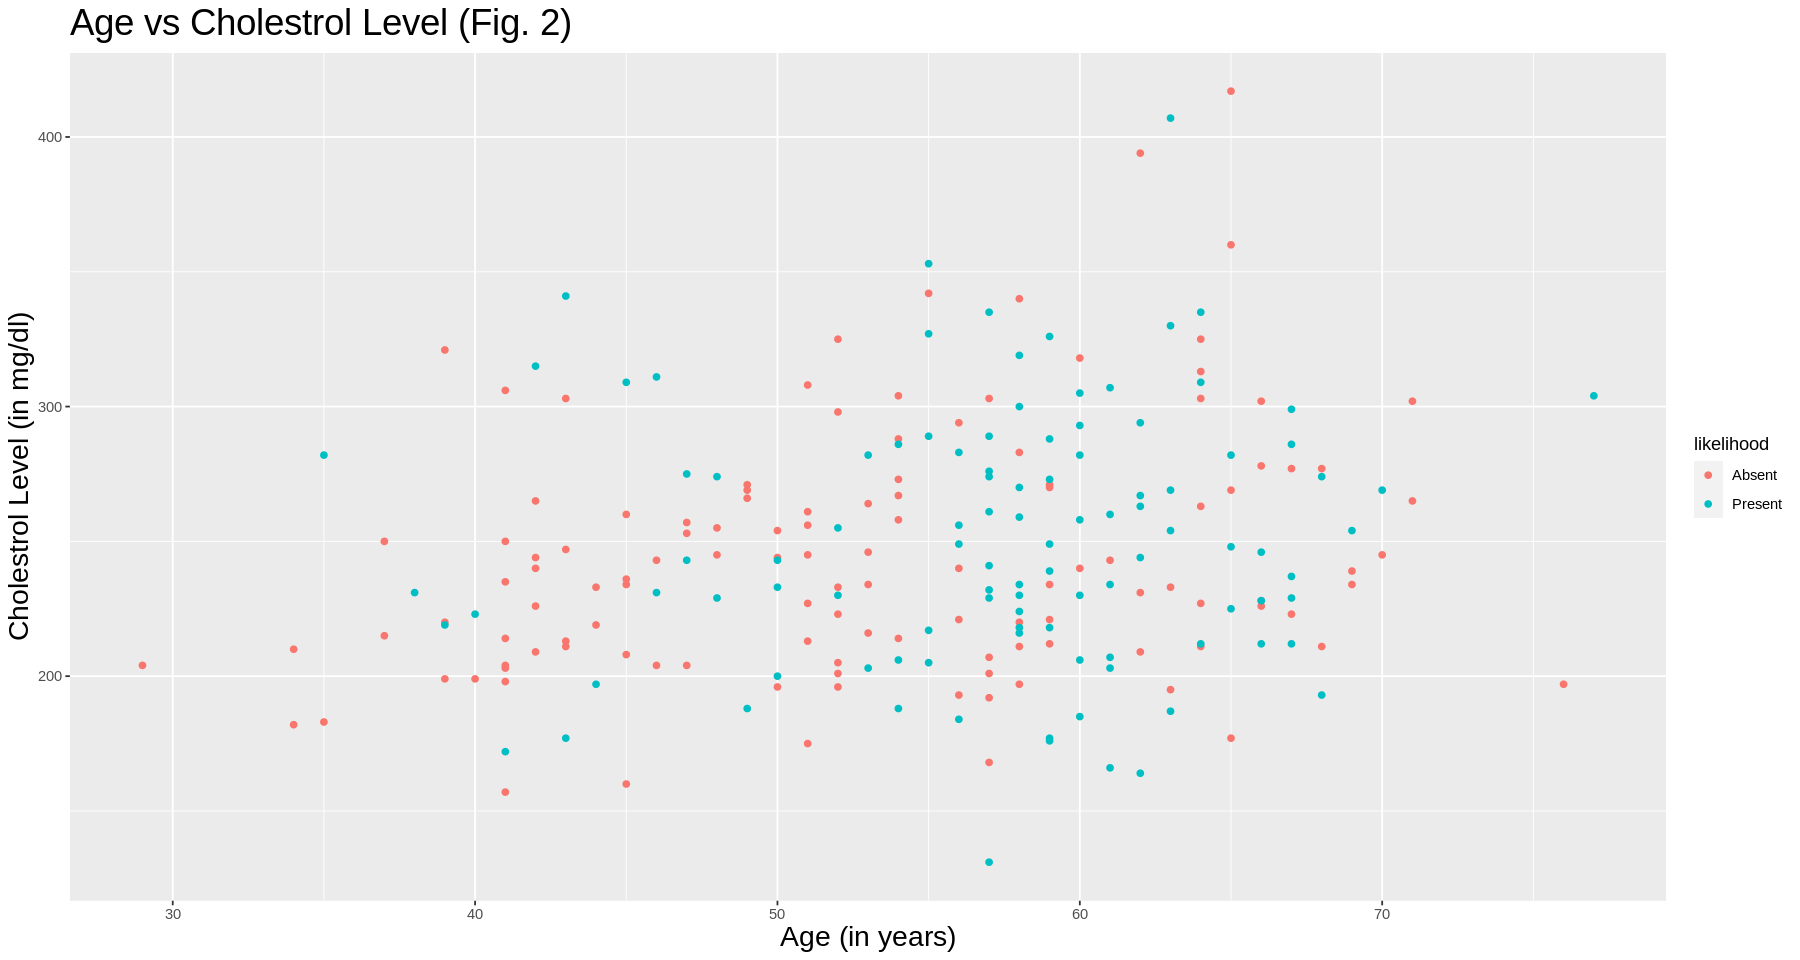

In [15]:
##Age vs Cholestrol Level, coloured by likelihood

age_v_chol_plot <- data_train |>
                ggplot(aes(x = age, y = cholestrol, color = likelihood)) +
                geom_point() +
                xlab("Age (in years)") +
                ylab("Cholestrol Level (in mg/dl)") +
                ggtitle("Age vs Cholestrol Level (Fig. 2)") + 
                theme(plot.title = element_text(size=22),
                     axis.title = element_text(size=17))

age_v_chol_plot